In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
artworks <- read_csv("https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv")


Parsed with column specification:
cols(
  .default = col_character(),
  DateAcquired = col_date(format = ""),
  ObjectID = col_double(),
  `Circumference (cm)` = col_logical(),
  `Depth (cm)` = col_double(),
  `Diameter (cm)` = col_double(),
  `Height (cm)` = col_double(),
  `Length (cm)` = col_logical(),
  `Weight (kg)` = col_double(),
  `Width (cm)` = col_double(),
  `Seat Height (cm)` = col_logical(),
  `Duration (sec.)` = col_logical()
)

See spec(...) for full column specifications.

Warning message:
“2892 parsing failures.
 row         col           expected actual                                                                                         file
1002 Length (cm) 1/0/T/F/TRUE/FALSE  17.8  'https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv'
1003 Length (cm) 1/0/T/F/TRUE/FALSE  19.0  'https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv'
1004 Length (cm) 1/0/T/F/TRUE/FALSE  18.1  'https://media

In [8]:
select_artworks <- artworks %>%
                   select(c('Nationality', 'Height (cm)', 'Width (cm)'))
colnames(select_artworks) <- c("Nationality","Height.cm","Width.cm")
artworks_data <- select_artworks %>%
                 mutate(Area = Height.cm * Width.cm) %>%
                 select(Nationality, Area) %>%
                 filter(Nationality != "()", Area != 0|NA)

arrange_artworks <- arrange(artworks_data, Area)
arrange_artworks

Nationality,Area
<chr>,<dbl>
(American),0.300000
(Spanish),0.540000
(Japanese),0.677360
(American),0.770000
(American),0.889000
(British),0.960000
(American),0.960000
(French),1.000000
(Swiss),1.050000


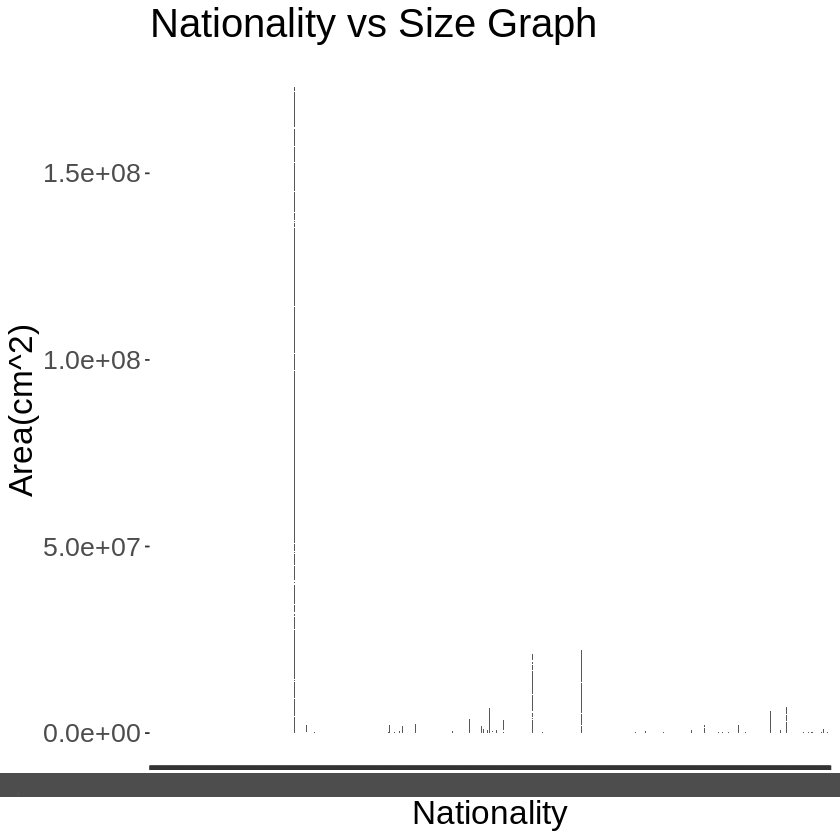

In [9]:
nationality_plot <- ggplot(artworks_data, aes(x = Nationality, y = Area)) +
                    geom_bar(stat = "identity") +
                    labs(x = "Nationality", y = "Area(cm^2)") +
                    ggtitle("Nationality vs Size Graph") +
                    theme(text = element_text(size = 20))
nationality_plot

The Area of artworks have so large gaps that I can hardly see anything from the graph.

In [23]:
average_size_data <- arrange_artworks %>%
    group_by(Nationality) %>%
    summarize( average_area = mean(Area)) 

average_size_data

`summarise()` ungrouping output (override with `.groups` argument)



Nationality,average_area
<chr>,<dbl>
() (),1029.0666
() () (),415.9932
() () () (),919.4600
() () () () (),4755.9368
() () () () () (),408.3314
() () () () () () () () () () () () () (),425.2500
() () () () () () () () () () () () () () (American) () () () () () () (American),964.0800
() () () () () () () () () () () () () (American) () (American),982.8200
() () () () () () () () () (American),585.6400


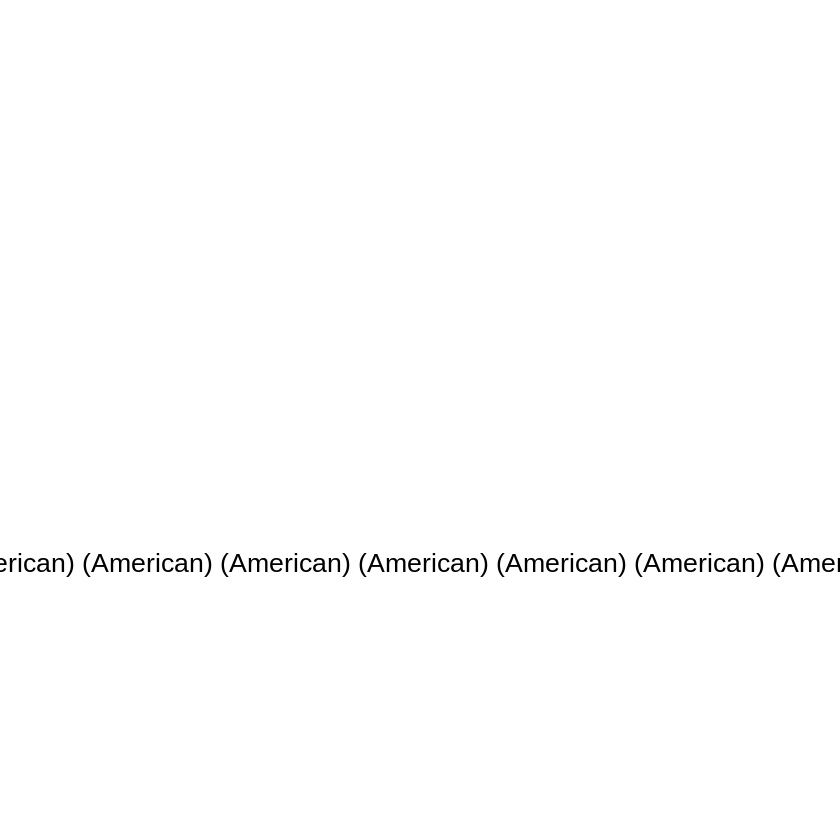